## Practical example linear regression sklearn

In [1]:
# import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## data preprocessing

In [2]:
# read data
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
# get descriptive statistics for the whole data set
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
# drop 'model'
data= raw_data.drop('Model', axis=1) #axis=1 => column, axis=0 => row
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
# check for missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
# remove up to 5% of observations to clean missing values
total = data.count().max() # => 4345
# missing1 = data.isnull().sum().max() # => 172
# missing_persentage = missing/total * 100
# print(missing_persentage) # => 3.96

# drop missing price
# data_no_mv = data.dropna(axis=0, subset=['Price'])
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


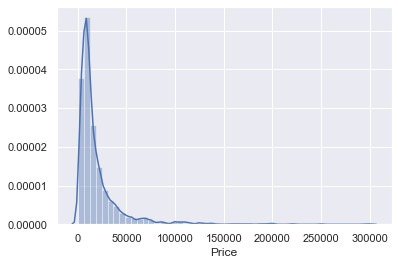

In [7]:
# plot distribution for some feature
sns.distplot(data_no_mv['Price']) # has an exponential distribution, left sqewed => there are outliers

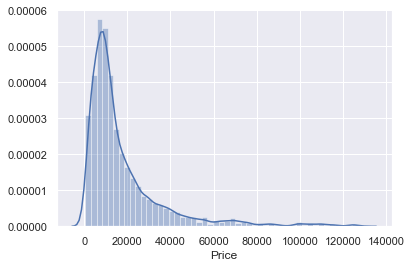

In [8]:
# remove price outliers => get 0.99 percentile
q = data_no_mv['Price'].quantile(0.99) # aproximately 130 000 usd
data_1 = data_no_mv[data_no_mv['Price']<q] # select data where price is less than identified 0,99 quintile
sns.distplot(data_1['Price'])

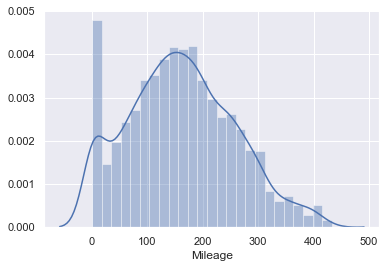

In [9]:
# do the same for other features with ouliers
q = data_no_mv['Mileage'].quantile(0.99) 
data_2 = data_1[data_1['Mileage']<q] 
sns.distplot(data_2['Mileage'])

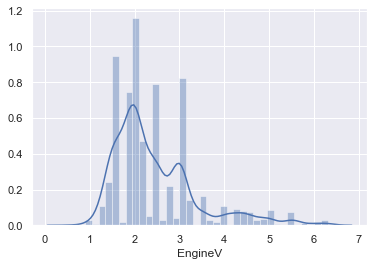

In [10]:
# for engine volume remove all wrong values (greater than 6.5)
data_3 = data_2[data_2['EngineV']<6.5] 
sns.distplot(data_3['EngineV'])

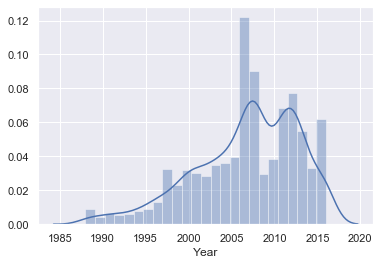

In [11]:
# remove vintage cars
# remove price outliers => get 0.01 percentile
q = data_no_mv['Year'].quantile(0.01) 
data_4 = data_3[data_3['Year']>q] # select data where year is greater than 0.01 quintile
sns.distplot(data_4['Year'])

In [12]:
# reset indexes after removing values from data set
data_cleaned = data_4.reset_index(drop='True')
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## OLS assumptions : linearity, no endogenety, normality and homoscedasticity, no autocorrelation , no multicollinearity"

### Linearity

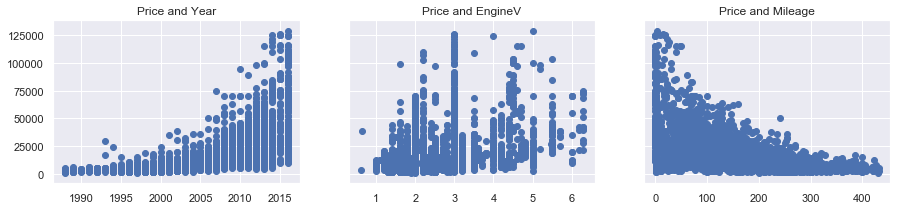

In [13]:
# Linearity
# create prolts for price/each of features
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
# year
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
# engine
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
# mileage
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show() # distribution is not linear => check if it is because price is not normally distributed

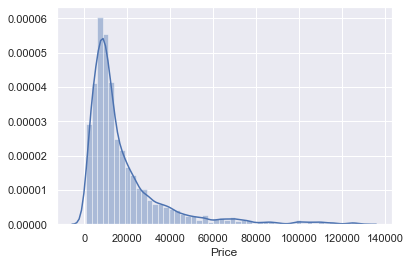

In [14]:
sns.distplot(data_cleaned['Price']) # not a normal distribution => apply log transformation

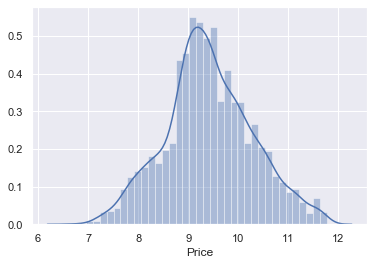

In [15]:
# create plot for price log
log_price = np.log(data_cleaned['Price'])
sns.distplot(log_price)

In [16]:
# add price log as a column
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


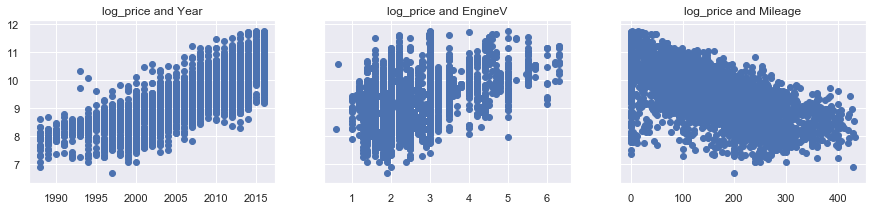

In [17]:
# check distribution again
# create prolts for price/each of features
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
# year
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
# engine
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
# mileage
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show() # distribution is linear

In [18]:
# drop original price value from data frame
data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


### no endogenety - assumed there is none

### normality and homoscedasticity

In [19]:
# normality assumed due to big sample
# zero mean considered by adding intercept to regression
# homoscedasticity - is already there as we already used log transformation

### no autocorrelation - assumed there is none as it is a snapshot data, not timeseries or so

### no multicollinearity

In [20]:
# year and mileadge will be correlated
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [21]:
# sklearn has no method to check for multicolliearity, use stats models
# use variance inflation factor VIF
# how much larger square root of standard error of the estimate is
# comapared to the situation when variable is uncorelated with other predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif # vif==1 => perfect,  between 1 and 5 => ok, >10 => bad 

,VIF,Features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [22]:
# looks like year is autocorrelated with other variables, remove year
data_cleaned = data_cleaned.drop(['Year'], axis=1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## add dummies for car brands

In [23]:
# for n categories create n-1 dummies
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True) # no dummy for audi
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [24]:
# reorder the columns
data_with_dummies.columns.values
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

In [25]:
# declare inputs and targets
targets = data_with_dummies['log_price']
inputs = data_with_dummies.drop(['log_price'], axis=1)

In [26]:
# standardize the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs) # usually not recommended to standardize dummy values, but ok for now

In [27]:
# split data in training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=365)

In [28]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

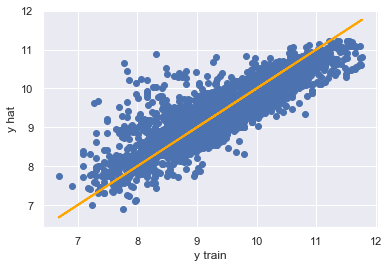

In [29]:
# plot predicted values
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)
plt.xlabel('y train')
plt.ylabel('y hat')
fig = plt.plot(y_train, y_train, lw=2, c='orange', label='regression line') # perfect line
plt.show() # our regression is not perfect, but is not too bad

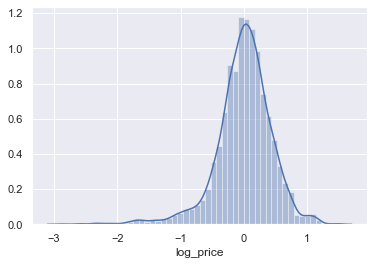

In [30]:
# plot resituals
sns.distplot(y_train - y_hat) # we see long tail on the left (regression overestimates some cars)

In [31]:
# calcualate r squared
reg.score(x_train, y_train) # regression explains 74% of data variability

0.7415645182486199

In [32]:
# extract model weights
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary # drop dummies are not there

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


In [33]:
data_cleaned.columns.values
data_cleaned['Brand'].unique() # audi is a benchmark for brand

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Test

In [34]:
# predict values for test set
y_hat_test = reg.predict(x_test)

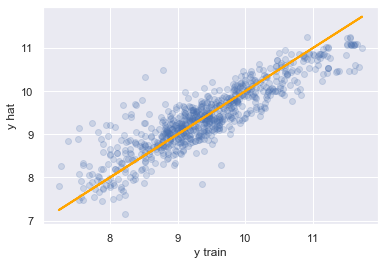

In [35]:
plt.scatter(y_test, y_hat_test, alpha=0.2) # alpha - proportional capacity of a point
plt.xlabel('y train')
plt.ylabel('y hat')
fig = plt.plot(y_test, y_test, lw=2, c='orange', label='regression line') # perfect line
plt.show() 

In [37]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf.head()


,Prediction,Target
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0


In [38]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf.head()

,Prediction,Target,Residual
0,10650.438709,2300.0,-8350.438709
1,8041.555683,13200.0,5158.444317
2,6799.069945,8100.0,1300.930055
3,7606.977689,6400.0,-1206.977689
4,11309.799759,9150.0,-2159.799759


In [39]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369


In [40]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465


In [45]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
639,30364.85,4999.00,-25365.85,507.42
462,35671.37,6500.00,-29171.37,448.79
485,9371.94,1900.00,-7471.94,393.26
0,10650.44,2300.00,-8350.44,363.06
619,16110.60,3600.00,-12510.60,347.52
192,6940.62,1599.00,-5341.62,334.06
629,7351.17,1850.00,-5501.17,297.36
111,16267.43,4300.00,-11967.43,278.31
298,17887.30,4800.00,-13087.30,272.65
396,16173.92,4400.00,-11773.92,267.59
